In [1]:
import tensorflow as tf
tf.__version__ 

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

'2.12.0'

In [2]:
# Import The Libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# Paths
train_Path = '/kaggle/input/train/train/train'
test_Path = '/kaggle/input/train/test/test'
val_set = '/kaggle/input/train/val/val'

In [4]:
# Set Resize variable
IMAGE_SIZE = [224, 224] 
# This is my desired image size... 
#and also ResNet50 accepts image of 224*224.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3, input_shape=(224,224,64)))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2, input_shape=(224,224,128)))
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(224, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 53, 53, 32)        0

In [9]:
logdir='logs'

In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_Path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8713 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory(val_set,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2905 images belonging to 10 classes.


In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
hist = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_28/6459542.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/80


2023-05-27 10:47:21.848744: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


273/273 [==============================] - 178s 607ms/step - loss: 1.5919 - accuracy: 0.4474 - val_loss: 1.2468 - val_accuracy: 0.5721
Epoch 2/80
273/273 [==============================] - 116s 424ms/step - loss: 1.0884 - accuracy: 0.6304 - val_loss: 0.9635 - val_accuracy: 0.6719
Epoch 3/80
273/273 [==============================] - 114s 418ms/step - loss: 0.8475 - accuracy: 0.7140 - val_loss: 0.8435 - val_accuracy: 0.7133
Epoch 4/80
273/273 [==============================] - 119s 434ms/step - loss: 0.6475 - accuracy: 0.7755 - val_loss: 0.7425 - val_accuracy: 0.7552
Epoch 5/80
273/273 [==============================] - 116s 424ms/step - loss: 0.5218 - accuracy: 0.8215 - val_loss: 0.4874 - val_accuracy: 0.8417
Epoch 6/80
273/273 [==============================] - 118s 431ms/step - loss: 0.4394 - accuracy: 0.8451 - val_loss: 0.6180 - val_accuracy: 0.8000
Epoch 7/80
273/273 [==============================] - 115s 422ms/step - loss: 0.3685 - accuracy: 0.8692 - val_loss: 0.4844 - val_accura

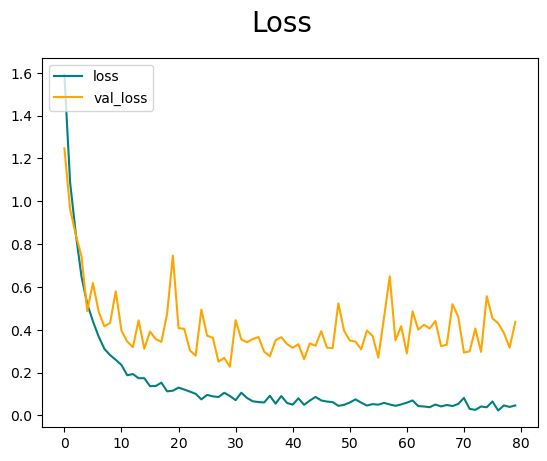

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

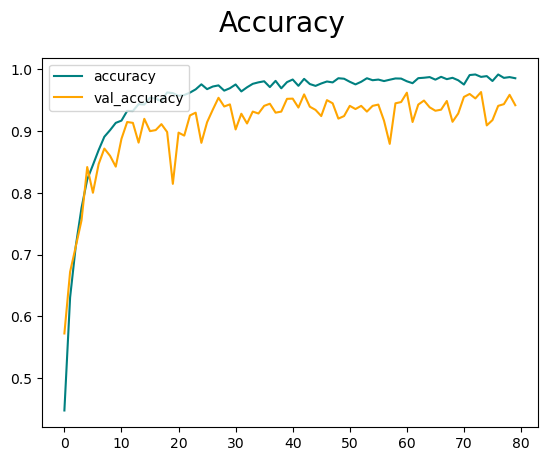

In [17]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()